# Problem Statement:

In this project, initially we need to preprocess the data and then develop an understanding of the different features of the data by performing exploratory analysis and creating visualizations. Further, after having sufficient knowledge about the attributes, you will perform a predictive task of classification to predict whether an individual makes over 50,000 a year or less by using different machine learning algorithms.


# Dataset:

The "Census Income" dataset from the UCI Machine Learning Repository that contains the income information for over 48,000 individuals taken from the 1994 US census.

For more details about this dataset, you can refer to the following link: https://archive.ics.uci.edu/ml/datasets/census+income

The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.

# Tasks Done:

1. Data Preprocessing & Data Manipulation:

a) Replaced all the missing values with NA.
b) Removed all the rows that contain NA values.
c) Get the count of different levels of the different columns.

2. Data Visualization:

a) Built count plot for "annual_income" column with hue - "sex", "race", "relationship".
b) Built a Histogram for the "age" column with number of bins equal to 50.
c) Built a heatmap of correlation matrix.

3. Logistic Regression:

a) Built a logistic regression model as follows:

i) Divided the dataset into training and test sets in 70:30 ratio.
ii) Built a logistic regression model where the dependent variable is 'annual Income' and rest of the variables as independent variables.
iii) Predicted the values on the test set.
iv)  Built a confusion matrix and  calculated the accuracy.

4. Decision Tree:

a) Built a decision tree model as follows:

i) Divided the dataset into training and test sets in 70:30 ratio.
ii) Built a decision tree model where the dependent variable is 'annual Income' and the rest of the variables as independent variables.
iii) Predicted the values on the test set.
iv)  Built a confusion matrix and calculated the accuracy.

5. Random Forest:

a) Built a random forest model as follows:

i) Divided the dataset into training and test sets in 70:30 ratio.
ii) Built a random forest model where the dependent variable is 'annual Income' and the rest of the variables as independent variables.
iii) Predicted values on the test set.
iv) Built a confusion matrix and calculated the accuracy.

6. Compare the accuracy score of all three models.

7. Conclusion:
   Random Forest model showing highest accuracy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('census-income.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.shape

(32561, 15)

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [8]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
annual_income         2
dtype: int64

In [9]:
df['annual_income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [10]:
df['native-country'].unique()             

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [12]:
df['age'].value_counts()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

In [13]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [14]:
df['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [15]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [16]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [17]:
df['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [18]:
df['capital-gain'].value_counts()

capital-gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

In [19]:
df['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [20]:
df['annual_income'].value_counts()

annual_income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [21]:
#  where  "?" is present, need to replace with 'nan' i.e. with null value. 

df=df.replace('?', np.nan)

In [22]:
df.isnull().sum()       

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [23]:
# here, 4262 null value present, but these are clustered in 3 columns. it is dificult to manipulate these null value one by one,
# but easy to drop.

In [24]:
df.dropna(inplace=True)

In [25]:
df.duplicated().sum()

23

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.shape

(30139, 15)

#  Data Visualization

In [28]:
# count plot

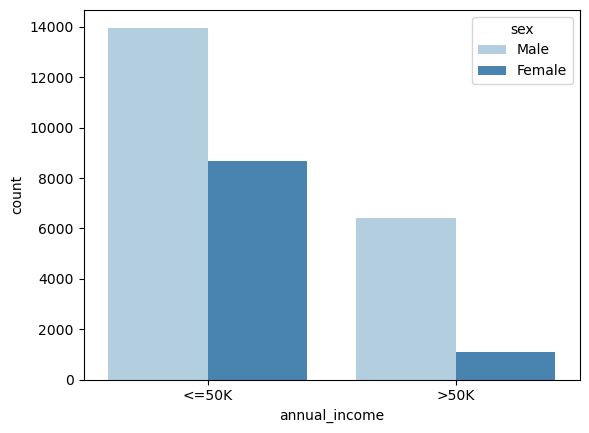

In [29]:
sns.countplot(x=df['annual_income'],hue=df['sex'], palette='Blues')
plt.show()

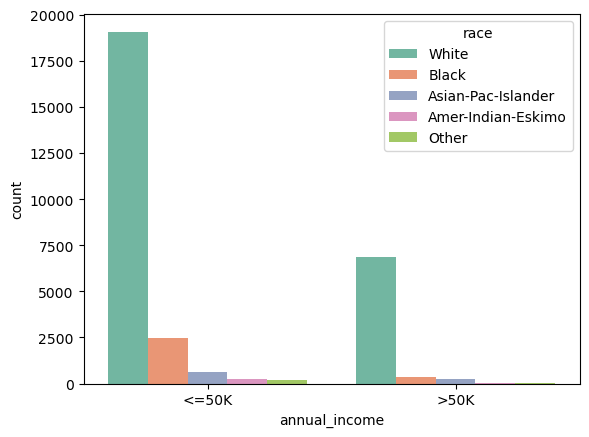

In [30]:
sns.countplot(x=df['annual_income'],hue=df['race'], palette='Set2')
plt.show()

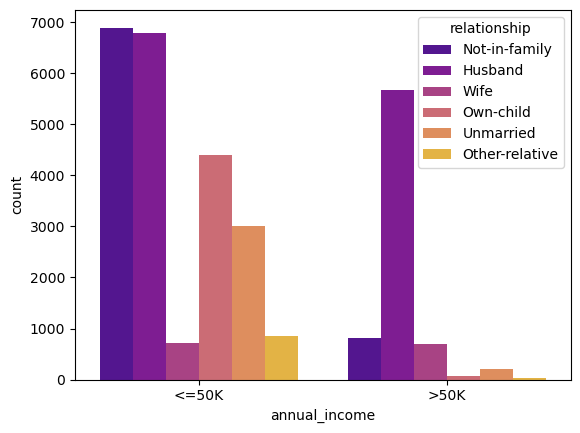

In [31]:
sns.countplot(x=df['annual_income'],hue=df['relationship'], palette='plasma')
plt.show()

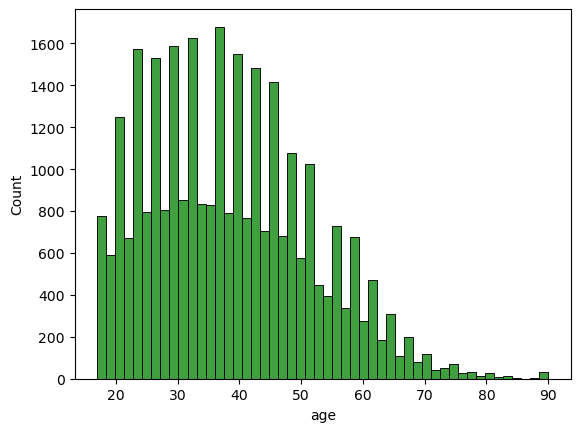

In [32]:
# Histogram

sns.histplot(data=df, x="age",bins=50, color="green")
plt.show()

In [33]:
# correlation

df.corr(numeric_only=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076279,0.043203,0.080162,0.060141,0.101348
fnlwgt,-0.076279,1.000000,-0.045199,0.000420,-0.009755,-0.023033
education-num,0.043203,-0.045199,1.000000,0.124455,0.079613,0.152842
capital-gain,0.080162,0.000420,0.124455,1.000000,-0.032255,0.080429
capital-loss,0.060141,-0.009755,0.079613,-0.032255,1.000000,0.052380
hours-per-week,0.101348,-0.023033,0.152842,0.080429,0.052380,1.000000


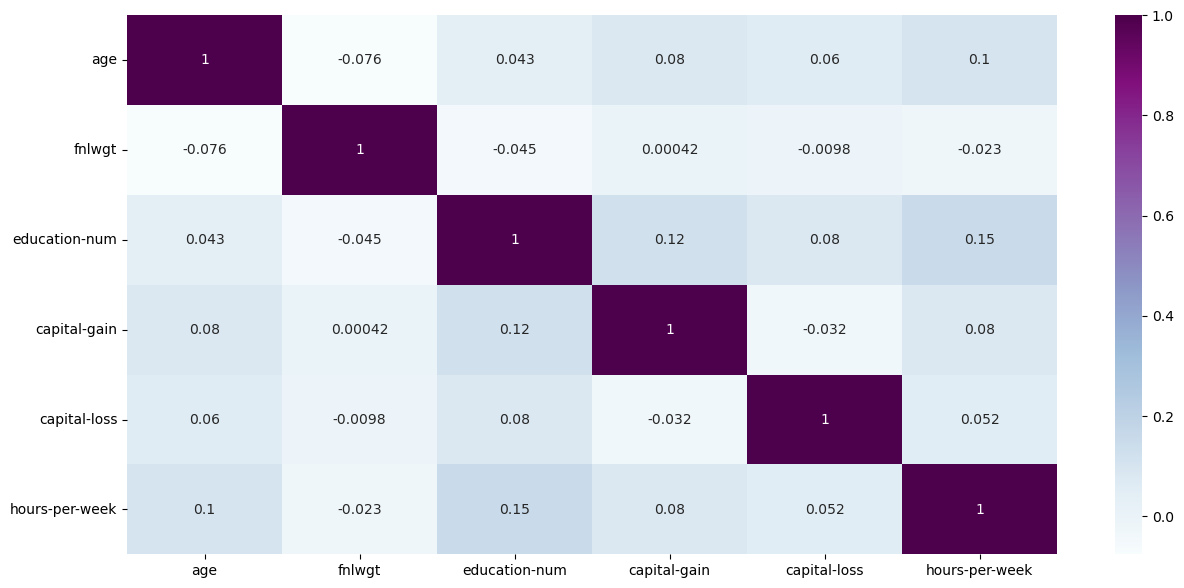

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="BuPu")
plt.show()

In [35]:
# Label Encoder-- converting categorical data into numerical

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()

In [38]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [39]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [40]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int32
 2   fnlwgt          30139 non-null  int64
 3   education       30139 non-null  int32
 4   education-num   30139 non-null  int64
 5   marital-status  30139 non-null  int32
 6   occupation      30139 non-null  int32
 7   relationship    30139 non-null  int32
 8   race            30139 non-null  int32
 9   sex             30139 non-null  int32
 10  capital-gain    30139 non-null  int64
 11  capital-loss    30139 non-null  int64
 12  hours-per-week  30139 non-null  int64
 13  native-country  30139 non-null  int32
 14  annual_income   30139 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


# Model building

In [42]:
# splitting data into dependent and independent
x=df.iloc[:,:-1]
y=df['annual_income']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3, random_state=56)

In [45]:
# Lets try different models for prediction.

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr_model=LogisticRegression()

In [48]:
# training the Model

lr_model.fit(x_train,y_train)

LogisticRegression()

In [49]:
# testing

lr_pred = lr_model.predict(x_test)

In [50]:
lr_pred

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
y_test

4140     0
8639     0
24350    0
16467    0
20870    0
        ..
2989     0
29602    0
26733    0
25503    1
29572    0
Name: annual_income, Length: 9042, dtype: int32

In [52]:
# Checking the performance of model

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [54]:
lr_acc=accuracy_score(y_test,lr_pred)

In [55]:
lr_acc

0.7956204379562044

In [56]:
confusion_matrix(y_test,lr_pred)

array([[6580,  199],
       [1649,  614]], dtype=int64)

#  Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt_model=DecisionTreeClassifier()

In [59]:
# training

dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
# testing

dt_pred=dt_model.predict(x_test)

In [61]:
dt_pred

array([0, 0, 0, ..., 0, 1, 0])

In [62]:
y_test

4140     0
8639     0
24350    0
16467    0
20870    0
        ..
2989     0
29602    0
26733    0
25503    1
29572    0
Name: annual_income, Length: 9042, dtype: int32

In [63]:
# checking the performance of model

In [64]:
dt_acc=accuracy_score(y_test,dt_pred)

In [65]:
dt_acc

0.8001548330015483

In [66]:
confusion_matrix(y_test,dt_pred)

array([[5844,  935],
       [ 872, 1391]], dtype=int64)

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf_model=RandomForestClassifier()

In [69]:
# training

rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
# testing

rf_pred=rf_model.predict(x_test)

In [71]:
rf_pred

array([0, 0, 0, ..., 0, 1, 0])

In [72]:
y_test

4140     0
8639     0
24350    0
16467    0
20870    0
        ..
2989     0
29602    0
26733    0
25503    1
29572    0
Name: annual_income, Length: 9042, dtype: int32

In [73]:
# checking the performance of model

In [74]:
rf_acc=accuracy_score(y_test,rf_pred)

In [75]:
rf_acc

0.8595443485954435

In [76]:
print("Accuracy of Logistic Regression : ", lr_acc)
print("Accuracy of Decision Tree : ", dt_acc)
print("Accuracy of Random Forest  : ", rf_acc)

Accuracy of Logistic Regression :  0.7956204379562044
Accuracy of Decision Tree :  0.8001548330015483
Accuracy of Random Forest  :  0.8595443485954435


In [77]:
# Accuracy of Random Forest is high.

In [78]:
# further optimization of Random Forest

In [79]:
tree=[i for i in range(50,800,50)]
tree

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750]

In [80]:
for N in tree:
    rf_model=RandomForestClassifier(n_estimators=N, random_state=56)
    rf_model.fit(x_train,y_train)
    rf_pred=rf_model.predict(x_test)
    acc=accuracy_score(y_test,rf_pred)
    print("Random Forest with", N, "number of trees having accuracy ", acc)

Random Forest with 50 number of trees having accuracy  0.8561159035611591
Random Forest with 100 number of trees having accuracy  0.858438398584384
Random Forest with 150 number of trees having accuracy  0.8591019685910197
Random Forest with 200 number of trees having accuracy  0.8603185136031851
Random Forest with 250 number of trees having accuracy  0.860650298606503
Random Forest with 300 number of trees having accuracy  0.8599867285998672
Random Forest with 350 number of trees having accuracy  0.8586595885865959
Random Forest with 400 number of trees having accuracy  0.858438398584384
Random Forest with 450 number of trees having accuracy  0.8588807785888077
Random Forest with 500 number of trees having accuracy  0.85854899358549
Random Forest with 550 number of trees having accuracy  0.8586595885865959
Random Forest with 600 number of trees having accuracy  0.85854899358549
Random Forest with 650 number of trees having accuracy  0.8598761335987614
Random Forest with 700 number of 

In [81]:
# here, Random Forest model with 250 no. of trees gives higher accuracy.

In [82]:
cm=confusion_matrix(y_test,rf_pred)
cm

array([[6339,  440],
       [ 828, 1435]], dtype=int64)

<Axes: >

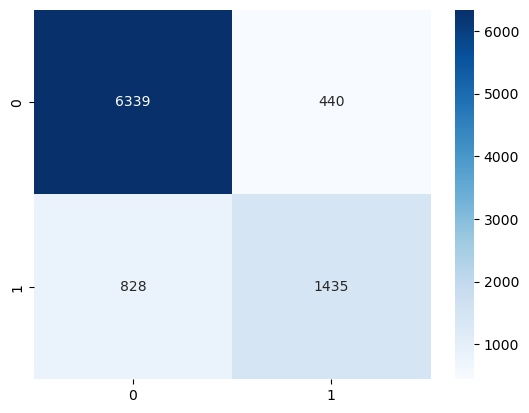

In [83]:
sns.heatmap(cm,annot=True, cmap="Blues",fmt="d")

In [84]:
# correctly classified records
6339+1435

7774

In [85]:
# wrongly classified records
828+440

1268




Hence, we go with RandomForest model to predict the annual income.

We moved step by step, analyzing, cleaning and modeling the data, and applied various machine learning models to achieve the desired predictions. We were able to achieve a model with quite a good accuracy.